<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/100%E5%B9%B4%E3%81%AB%E4%B8%80%E5%BA%A6%E3%81%AE%E6%A0%AA%E4%BE%A1%E4%B8%8B%E8%90%BD%E7%8E%87_%E3%81%BE%E3%81%A8%E3%82%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [2]:
#データの読み込み 後で変更
df = pd.read_csv("/content/drive/MyDrive/rate_of_change_kurosu_200509.csv")

<ipython-input-13-83d607f9bd28>:102: RuntimeWarning: invalid value encountered in sqrt
  sqbx = np.sqrt(b*data)
<ipython-input-13-83d607f9bd28>:112: RuntimeWarning: invalid value encountered in sqrt
  sqbx = np.sqrt(b*data)
<ipython-input-13-83d607f9bd28>:91: RuntimeWarning: invalid value encountered in sqrt
  f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
<ipython-input-13-83d607f9bd28>:95: RuntimeWarning: invalid value encountered in sqrt
  F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


SLSC (Gumbel): 465.4271137543479
SLSC (GEV): 1043.025564060924
SLSC (SQET): [nan]
SLSC (Normal): 1148.958826024466
0.2124487675007528


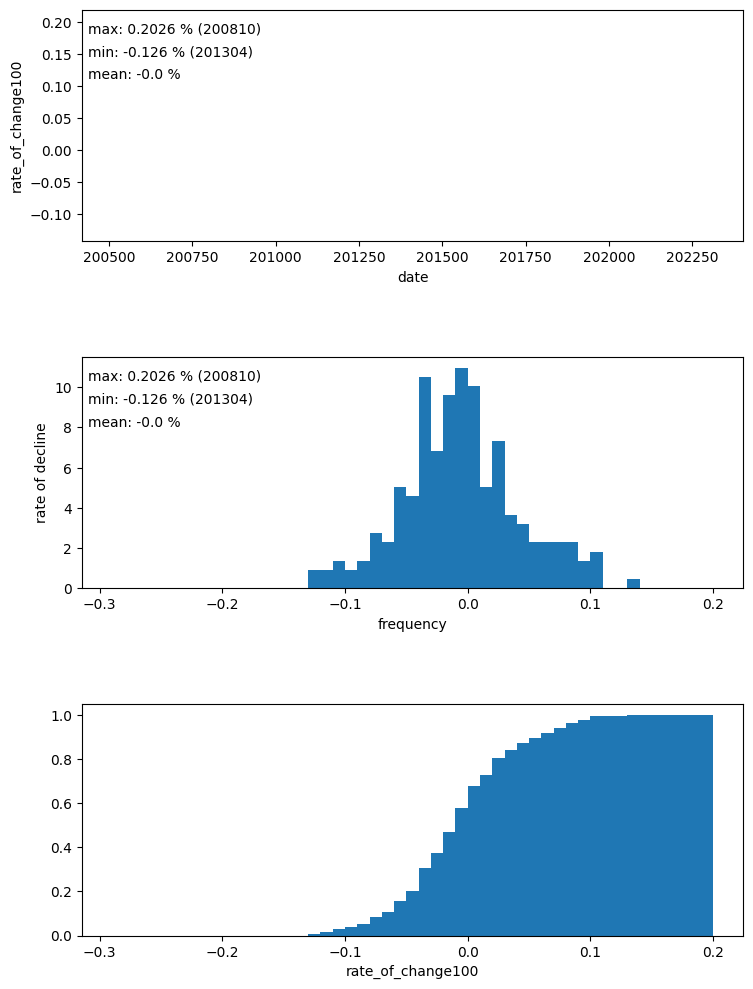

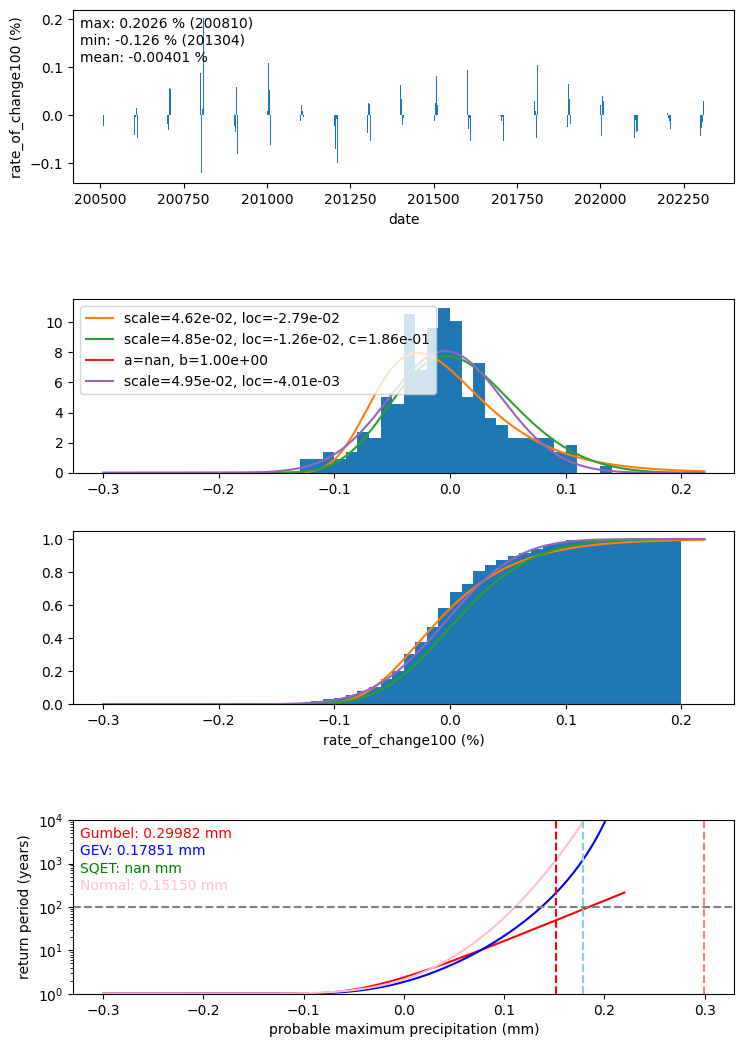

In [13]:
import matplotlib.pyplot as plt
import numpy as np

date = df["date"].values
rate_of_change100 = df["rate_of_change_minus"].values

# ndarrayに変換
date = np.array(date)
rate_of_change100 = np.array(rate_of_change100)

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.70, 0.80, 0.20])
ax02 = fig.add_axes([0.10, 0.40, 0.80, 0.20])
ax03 = fig.add_axes([0.10, 0.10, 0.80, 0.20])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(date, rate_of_change100)

ax01.set_xlabel('date')
ax01.set_ylabel('rate_of_change100')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {rate_of_change100.max()} % ({date[np.argmax(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {rate_of_change100.min()} % ({date[np.argmin(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {rate_of_change100.mean():.1f} %', transform=ax01.transAxes)

# --- plot 2 と plot 3
# bin のためのリストを作成する
bins = [-0.3+0.01*(i+1) for i in range(int((rate_of_change100.max()+0.3)/0.01))]

# ヒストグラムを表示
ax02.hist(rate_of_change100, bins=bins, density=True)
#ax02.set_xlim(99, 101)
ax02.set_xlabel('frequency')
ax02.set_ylabel('rate of decline')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {rate_of_change100.max()} % ({date[np.argmax(rate_of_change100)]})', transform=ax02.transAxes)
fig.text(0.01, 0.8, f'min: {rate_of_change100.min()} % ({date[np.argmin(rate_of_change100)]})', transform=ax02.transAxes)
fig.text(0.01, 0.7, f'mean: {rate_of_change100.mean():.1f} %', transform=ax02.transAxes)


# 累積ヒストグラムを表示
ax03.hist(rate_of_change100, bins=bins, cumulative=True, density=True)
ax03.set_xlabel('rate_of_change100')

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)
#ここまで変更済み

import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss
from scipy.optimize import minimize, root_scalar
#正規分布　試し
# rate_of_change100データから正規分布のパラメータを推定
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 平均の計算
mean_normal = np.mean(rate_of_change100)
# 標準偏差の計算
std_normal = np.std(rate_of_change100)

# 正規分布の確率密度関数を生成
#正規x = np.linspace(min(rate_of_change100), max(rate_of_change100), 1000)
x = np.linspace(-0.3, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()+0.3)/0.01) + 1)
#x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)#
normal_pdf = ss.norm.pdf(x, mean_normal, std_normal)

# rate_of_change100のヒストグラムと正規分布の確率密度関数を描画
#plt.hist(rate_of_change100, bins=bins, density=True, alpha=0.6, color='g')
#plt.plot(x, normal_pdf, 'r', label='Normal Distribution')
#plt.title('Fit Results with Normal Distribution')
#plt.xlabel('Rate of Change')
#plt.ylabel('Probability Density')
#plt.legend()
#plt.show()

#-----------------------------------------------------------------------------
# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

def sqet_cdf(x, a, b):
    F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return F

# SQETの対数尤度関数 (にマイナスをつけたもの)
def mL_sqet(b, data):
    n = len(data)

    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))

    L = n*np.log(a) + n*np.log(b) -n*np.log(2) - np.sum(sqbx)
    L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
    return -L

# bからaを求める式
def b2a_sqet(b, data):
    n = len(data)
    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
    return a

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram-and-fitted-pdf-mod.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.80, 0.80, 0.15])
ax02 = fig.add_axes([0.10, 0.55, 0.80, 0.15])
ax03 = fig.add_axes([0.10, 0.35, 0.80, 0.15])
ax04 = fig.add_axes([0.10, 0.10, 0.80, 0.15])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(date, rate_of_change100)

ax01.set_xlabel('date')
ax01.set_ylabel('rate_of_change100 (%)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {rate_of_change100.max()} % ({date[np.argmax(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {rate_of_change100.min()} % ({date[np.argmin(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {rate_of_change100.mean():.5f} %', transform=ax01.transAxes)

# --- plot 2 と plot 3
# Gumbel分布を当てはめる
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 一般化極値分布を当てはめる
c_gev, loc_gev, scale_gev = ss.genextreme.fit(rate_of_change100, method='MLE')

# 平方根指数型最大値分布を当てはめる
res = minimize(mL_sqet, x0=[1.0], args=rate_of_change100,
               bounds=[(0, None)], method='Nelder-Mead')
b_sqet = res.x[0]
a_sqet = b2a_sqet(b_sqet, rate_of_change100)

gbl = ss.gumbel_r(loc=loc_gumbel, scale=scale_gumbel)
gev = ss.genextreme(c=c_gev, loc=loc_gev, scale=scale_gev)

# bin, x のためのリストを作成する
#[10*(i+1) for i in range(int(rate_of_change100.max()/10) + 1)]
#x = np.linspace(0.0, 10.0*(int(rate_of_change100.max()/10) + 1), 20*int(annual_max_daily_prcp.max()/10) + 1)
#bins = [99.7+0.01*(i+1) for i in range(int((rate_of_change100.max()-99.7)/0.01))]
#x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)
x = np.linspace(-0.3, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()+0.3)/0.01) + 1)
# ヒストグラムを表示
ax02.hist(rate_of_change100, bins=bins, density=True)

# 当てはめた分布をプロット
ax02.plot(x, gbl.pdf(x), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")
ax02.plot(x, gev.pdf(x), label=f"scale={scale_gev:.2e}, loc={loc_gev:.2e}, c={c_gev:.2e}")
ax02.plot(x, sqet(x, a_sqet, b_sqet), label=f"a={a_sqet:.2e}, b={b_sqet:.2e}")
ax02.plot(x, ss.norm.pdf(x, mean_normal, std_normal), label=f"scale={std_normal:.2e}, loc={mean_normal:.2e}")


ax02.legend()

# 累積ヒストグラムを表示
ax03.hist(rate_of_change100, bins=bins, cumulative=True, density=True)
ax03.plot(x, gbl.cdf(x))
ax03.plot(x, gev.cdf(x))
ax03.plot(x, sqet_cdf(x, a_sqet, b_sqet))
ax03.plot(x, ss.norm.cdf(x, mean_normal, std_normal))


ax03.set_xlabel('rate_of_change100 (%)')

# --- plot 4
#x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 20), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)
# 再現期間と確率降水量のプロット
ax04.plot(x, 1.0/(1.0-gbl.cdf(x)), color='red')
ax04.plot(x, 1.0/(1.0-gev.cdf(x)), color='blue')
ax04.plot(x, 1.0/(1.0-sqet_cdf(x, a_sqet, b_sqet)), color='green')
#ax04.plot(x, 1.0/(1.0-sqet_cdf(x, a_sqet, b_sqet)), color='green')
ax04.plot(x, 1.0/(1.0-ss.norm.cdf(x, mean_normal, std_normal)), color='pink')

ax04.set_yscale('log')
ax04.set_ylim(1, 10000)
ax04.set_xlabel('probable maximum precipitation (mm)')
ax04.set_ylabel('return period (years)')

# 確率降水量の値を求める式
# Normal分布
# rate_of_change100データから正規分布のパラメータを推定
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 正規分布の平均と標準偏差に変換
#mean_normal = loc_gumbel
#std_normal = scale_gumbel * np.pi / np.sqrt(6)

# 正規分布の確率密度関数を定義
#def pp_normal(x):  これはppではない
#    return ss.norm.pdf(x, mean_normal, std_normal)

# データの範囲を取得
#x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)

# 正規分布の確率密度関数を計算
#pdf_normal = pp_normal(x)

#Normal分布２
import numpy as np
from scipy.stats import norm

def inverse_normal_cdf(p, mu=0, sigma=1):
    # 標準正規分布の逆関数を計算
    z = norm.ppf(p)

    # 標準正規分布から実際の正規分布へ変換
    x = mu + sigma * z

def pp_normal(std_normal,mean_normal, T):
    p = 1.0 - 1.0/T
    # 標準正規分布の逆関数を計算
    z = norm.ppf(p)
    x = mean_normal + std_normal * z

    return x



# Gumbel分布
def pp_gumbel(scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc - scale*np.log(-np.log(p))

    return x

# 一般化極値分布
def pp_gev(c, scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc + scale/c*(1.0-(-np.log(p))**c)

    return x

# 平方根指数型最大値分布
def pp_sqet(a, b, T):
    p = 1.0 - 1.0/T

    def f(t):
        return np.log(1.0 + t) - t - np.log(-1.0/a*np.log(p))

    sol = root_scalar(f=f, method='newton', x0=100.0)
    x = sol.root**2/b

    return x



# 再現期間50年の確率降水量を算出し、線を引く
ax04.axhline(100.0, color='gray', linestyle='dashed')
ax04.axvline([pp_gumbel(scale_gumbel, loc_gumbel, 1200.0)], color='salmon', linestyle='dashed')
ax04.axvline([pp_gev(c_gev, scale_gev, loc_gev, 1200.0)], color='skyblue', linestyle='dashed')
ax04.axvline([pp_sqet(a_sqet, b_sqet, 1200.0)], color='lightgreen', linestyle='dashed')
ax04.axvline([pp_normal(std_normal,mean_normal, 1200.0)], color='red', linestyle='dashed')
#pp_normal(std_normal,mean_normal, T)
# グラフ上に再現期間50年の確率降水量の値を書く
fig.text(0.01, 0.9, f'Gumbel: {pp_gumbel(scale_gumbel, loc_gumbel, 1200.0):.5f} mm', color='red', transform=ax04.transAxes)
fig.text(0.01, 0.8, f'GEV: {pp_gev(c_gev, scale_gev, loc_gev, 1200.0):.5f} mm', color='blue', transform=ax04.transAxes)
fig.text(0.01, 0.7, f'SQET: {pp_sqet(a_sqet, b_sqet, 1200.0):.5f} mm', color='green', transform=ax04.transAxes)
fig.text(0.01, 0.6, f'Normal: {pp_normal(std_normal,mean_normal, 1200.0):.5f} mm', color='pink', transform=ax04.transAxes)
#pp_normal(std_normal,mean_normal, T)


#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)

#12.12は0.99=x/1200  x=1188  1200/1188   T=1/0.99*12   T=1/0.01*12
denominator_gumbel = pp_gumbel(scale_gumbel, loc_gumbel, 1200.0)-pp_gumbel(scale_gumbel, loc_gumbel, 12.121212)
denominator_GEV = pp_gev(c_gev, scale_gev, loc_gev, 1200.0)-pp_gev(c_gev, scale_gev, loc_gev, 12.121212)
denominator_SQET = pp_sqet(a_sqet, b_sqet, 1200.0)-pp_sqet(a_sqet, b_sqet, 12.121212)
denominator_Normal = pp_normal(std_normal,mean_normal, 1200.0)-pp_normal(std_normal,mean_normal, 12.121212)
#print(denominator_gumbel)
data_count = len(rate_of_change100)
#print(data_count)
#データの読み込み
df_up = pd.read_csv("/content/drive/MyDrive/rate_of_change_kurosu_200509_up.csv")


from scipy.stats import gumbel_r

# Gumbel分布のパラメータを設定
location = loc_gumbel # 位置パラメータ
scale = scale_gumbel  # 尺度パラメータ

# Gumbel分布の逆関数を計算
#x_at_gumbel = gumbel_r.ppf(0.5/220, loc=location, scale=scale)

rate_of_change100_up = df["rate_of_change100"].values
rate_of_change100_up = np.array(rate_of_change100_up)
total_s2_gumbel = 0
#    x_at_gumbel = calculate_x_at_gumbel(i)
for i in range(0, 219):  # iを1から220まで変化させる
    s2_gumbel = (rate_of_change100_up[i]-gumbel_r.ppf((0.5 + i)/data_count, loc=location, scale=scale))**2
    total_s2_gumbel += s2_gumbel
#print(gumbel_r.ppf(0.99916, loc=location, scale=scale))
# GEV分布の逆関数を計算
total_s2_GEV = 0
from scipy.stats import genextreme

def find_x_for_GEV_cdf(target_cdf, c, loc, scale):
    # GEV分布の逆関数を用いて、目標の累積分布関数に対応するxを求める
    x = genextreme.ppf(target_cdf, c, loc=loc, scale=scale)
    return x
c = c_gev
loc = loc_gev
scale = scale_gev

#print(f"目標の累積分布関数が {target_cdf} のときの x は {result_x} です。")
for i in range(0, 219):  # iを1から220まで変化させる
    target_cdf = (0.5 + i)/data_count
    s2_GEV = (rate_of_change100_up[i]-find_x_for_GEV_cdf(target_cdf, c, loc, scale))**2
    total_s2_GEV += s2_GEV

# SQET分布の逆関数を計算
total_s2_SQET = 0
import numpy as np
from scipy.optimize import fsolve

#print("目標確率になる x:", solution[0])
for i in range(0, 219):  # iを1から220まで変化させる
    target_probability = (0.5 + i)/data_count
    solution = fsolve(lambda x: sqet_cdf(x, a_sqet, b_sqet) - target_probability, x0=0.0)
    s2_SQET = (rate_of_change100_up[i]-solution)**2
    total_s2_SQET += s2_SQET

# Normal分布の逆関数を計算
total_s2_Normal = 0
from scipy.stats import norm

def find_x_for_cdf(target_cdf, mean_normal, std_normal):
    # 正規分布の逆関数を用いて、目標の累積分布関数に対応するxを求める
    x = norm.ppf(target_cdf, loc=mean_normal, scale=std_normal)
    return x


for i in range(0, 219):  # iを1から220まで変化させる
    s2_Normal = (rate_of_change100_up[i]-find_x_for_cdf((0.5 + i)/data_count, mean_normal, std_normal))**2
    #find_x_for_cdf((0.5 + i)/data_count, mean_normal, std_normal)
    total_s2_Normal += s2_Normal

numerator_gumbel = (total_s2_gumbel/data_count)**0.5
numerator_GEV = (total_s2_GEV/data_count)**0.5
numerator_SQET = (total_s2_SQET/data_count)**0.5
numerator_Normal = (total_s2_Normal/data_count)**0.5


SLSC_gumbel = numerator_gumbel/denominator_gumbel
SLSC_GEV = numerator_GEV/denominator_GEV
SLSC_SQET = numerator_SQET/denominator_SQET
SLSC_Normal = numerator_Normal/denominator_Normal


print(f"SLSC (Gumbel): {SLSC_gumbel}")
print(f"SLSC (GEV): {SLSC_GEV}")
print(f"SLSC (SQET): {SLSC_SQET}")
print(f"SLSC (Normal): {SLSC_Normal}")
#リーマンショックは
print(gumbel_r.ppf(0.993, loc=location, scale=scale))

Text(0.01, 0.7, 'mean: -0.0040 ')

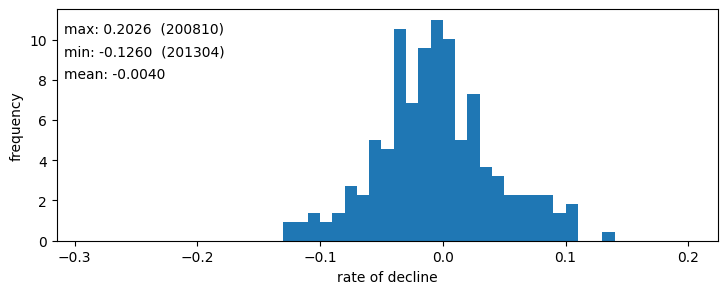

In [19]:
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram.png'
ax02 = fig.add_axes([0.10, 0.40, 0.80, 0.20])
# ヒストグラムを表示
ax02.hist(rate_of_change100, bins=bins, density=True)
#ax02.set_xlim(99, 101)
ax02.set_xlabel('rate of decline')
ax02.set_ylabel('frequency')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {rate_of_change100.max():.4f}  ({date[np.argmax(rate_of_change100)]})', transform=ax02.transAxes)
fig.text(0.01, 0.8, f'min: {rate_of_change100.min():.4f}  ({date[np.argmin(rate_of_change100)]})', transform=ax02.transAxes)
fig.text(0.01, 0.7, f'mean: {rate_of_change100.mean():.4f} ', transform=ax02.transAxes)